In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

In [2]:
ed= pd.read_csv('./Data/Most-Recent-Cohorts-All-Data-Elements.csv')

C:\Users\hwk70\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (9,1547,1589,1595,1596,1597,1598,1601,1602,1608,1619,1620,1621,1622,1623,1624,1625,1626,1627,1628,1629,1640,1643,1648,1653,1657,1664,1665,1666,1669,1670,1674,1679,1683,1688,1689,1690,1691,1692,1697,1700,1702,1703,1704,1705,1706,1707,1725,1726,1727,1728,1729,1743,1815,1816,1817,1818,1823,1824,1830,1831,1846,1879,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,1890,1891,1892,1893,1894,1895,1896,1897,1898,1909,1910,1911,1912,1913,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1983,1984,2376,2377) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
ed.head()

,UNITID,OPEID,OPEID6,INSTNM,CITY,STABBR,ZIP,ACCREDAGENCY,INSTURL,NPCURL,...,BBRR2_FED_UGCOMP_PAIDINFULL_SUPP,BBRR2_FED_UGCOMP_DISCHARGE_SUPP,LPSTAFFORD_CNT,LPSTAFFORD_AMT,LPPPLUS_CNT,LPPPLUS_AMT,LPGPLUS_CNT,LPGPLUS_AMT,FEDSCHCD,SEARCH_STRING
0,100654,100200,1002,Alabama A & M University,Normal,AL,35762,Southern Association of Colleges and Schools C...,www.aamu.edu/,www.aamu.edu/admissions-aid/tuition-fees/net-p...,...,PrivacySuppressed,PrivacySuppressed,31374,922456254,5201,113949554,1004,15578483,001002,Alabama A & M University AAMU
1,100663,105200,1052,University of Alabama at Birmingham,Birmingham,AL,35294-0110,Southern Association of Colleges and Schools C...,https://www.uab.edu,https://uab.studentaidcalculator.com/survey.aspx,...,0.06289779108947,PrivacySuppressed,56997,1720042015,3727,87421879,3461,134126588,001052,University of Alabama at Birmingham
2,100690,2503400,25034,Amridge University,Montgomery,AL,36117-3553,Southern Association of Colleges and Schools C...,www.amridgeuniversity.edu,www2.amridgeuniversity.edu:9091/,...,PrivacySuppressed,PrivacySuppressed,4463,174222020,16,309618,298,16290781,016885,Amridge University Southern Christian Universi...
3,100706,105500,1055,University of Alabama in Huntsville,Huntsville,AL,35899,Southern Association of Colleges and Schools C...,www.uah.edu,finaid.uah.edu/,...,0.09598603839441,PrivacySuppressed,19702,407184805,1397,29789762,144,2377759,001055,University of Alabama in Huntsville UAH Unive...
4,100724,100500,1005,Alabama State University,Montgomery,AL,36104-0271,Southern Association of Colleges and Schools C...,www.alasu.edu,www.alasu.edu/cost-aid/tuition-costs/net-price...,...,PrivacySuppressed,PrivacySuppressed,34246,947070736,4602,95359062,587,12174367,001005,Alabama State University


In [4]:
print ("Rows     : " ,ed.shape[0])
print ("Columns  : " ,ed.shape[1])
print ("\nFeatures : \n" ,ed.columns.tolist())
print ("\nMissing values :  ", ed.isnull().sum().values.sum())
print ("\nUnique values :  \n",ed.nunique())

print("\nFirst 5 Rows :  \n",ed.head())

print("\nLast 5 Rows :  \n",ed.tail())

Rows     :  6806
Columns  :  2384

Features : 
 ['UNITID', 'OPEID', 'OPEID6', 'INSTNM', 'CITY', 'STABBR', 'ZIP', 'ACCREDAGENCY', 'INSTURL', 'NPCURL', 'SCH_DEG', 'HCM2', 'MAIN', 'NUMBRANCH', 'PREDDEG', 'HIGHDEG', 'CONTROL', 'ST_FIPS', 'REGION', 'LOCALE', 'LOCALE2', 'LATITUDE', 'LONGITUDE', 'CCBASIC', 'CCUGPROF', 'CCSIZSET', 'HBCU', 'PBI', 'ANNHI', 'TRIBAL', 'AANAPII', 'HSI', 'NANTI', 'MENONLY', 'WOMENONLY', 'RELAFFIL', 'ADM_RATE', 'ADM_RATE_ALL', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'SATWR25', 'SATWR75', 'SATVRMID', 'SATMTMID', 'SATWRMID', 'ACTCM25', 'ACTCM75', 'ACTEN25', 'ACTEN75', 'ACTMT25', 'ACTMT75', 'ACTWR25', 'ACTWR75', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID', 'SAT_AVG', 'SAT_AVG_ALL', 'PCIP01', 'PCIP03', 'PCIP04', 'PCIP05', 'PCIP09', 'PCIP10', 'PCIP11', 'PCIP12', 'PCIP13', 'PCIP14', 'PCIP15', 'PCIP16', 'PCIP19', 'PCIP22', 'PCIP23', 'PCIP24', 'PCIP25', 'PCIP26', 'PCIP27', 'PCIP29', 'PCIP30', 'PCIP31', 'PCIP38', 'PCIP39', 'PCIP40', 'PCIP41', 'PCIP42', 'PCIP43', 'PCIP4

In [5]:
edf = ed[['MD_EARN_WNE_P6','GRAD_DEBT_MDN','C150_4', 'AVGFACSAL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'SAT_AVG', 'CDR2', 'PCIP14', 'PCIP26', 'PCIP51', 'PCIP09']]

In [6]:
edf.head()


,MD_EARN_WNE_P6,GRAD_DEBT_MDN,C150_4,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2,PCIP14,PCIP26,PCIP51,PCIP09
0,25200,33375,0.2685,7101.0,9744.0,18354.0,957.0,0.114,0.1183,0.0927,0.0000,0.0000
1,35100,22500,0.5829,10717.0,8568.0,19704.0,1220.0,0.060,0.0813,0.0876,0.2255,0.0375
2,30700,27334,0.4000,4292.0,6900.0,6900.0,NaN,0.071,0.0000,0.0000,0.0000,0.0000
3,36200,21607,0.5187,9442.0,10714.0,22362.0,1314.0,0.077,0.2892,0.0436,0.1543,0.0194
4,22600,32000,0.3001,7754.0,11068.0,19396.0,972.0,0.132,0.0000,0.0831,0.1677,0.0892


In [7]:
edf=edf.rename(columns = {"PCIP14": "Engineering",
                      "PCIP26": "BioMedical",
           "PCIP51": "Health_Professions",
           "PCIP09": "Communication"})

In [8]:
edf.dtypes

MD_EARN_WNE_P6         object
GRAD_DEBT_MDN          object
C150_4                float64
AVGFACSAL             float64
TUITIONFEE_IN         float64
TUITIONFEE_OUT        float64
SAT_AVG               float64
CDR2                  float64
Engineering           float64
BioMedical            float64
Health_Professions    float64
Communication         float64
dtype: object

In [9]:
print ("Rows     : " ,edf.shape[0])
print ("Columns  : " ,edf.shape[1])
print ("\nFeatures : \n" ,edf.columns.tolist())
print ("\nMissing values :  ", edf.isnull().sum().values.sum())
print ("\nUnique values :  \n",edf.nunique())

print("\nFirst 5 Rows :  \n",edf.head())

print("\nLast 5 Rows :  \n",edf.tail())

Rows     :  6806
Columns  :  12

Features : 
 ['MD_EARN_WNE_P6', 'GRAD_DEBT_MDN', 'C150_4', 'AVGFACSAL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'SAT_AVG', 'CDR2', 'Engineering', 'BioMedical', 'Health_Professions', 'Communication']

Missing values :   24734

Unique values :  
 MD_EARN_WNE_P6         571
GRAD_DEBT_MDN         1852
C150_4                1773
AVGFACSAL             3176
TUITIONFEE_IN         2815
TUITIONFEE_OUT        2881
SAT_AVG                449
CDR2                   307
Engineering            595
BioMedical             984
Health_Professions    2407
Communication          789
dtype: int64

First 5 Rows :  
   MD_EARN_WNE_P6 GRAD_DEBT_MDN  C150_4  AVGFACSAL  TUITIONFEE_IN  \
0          25200         33375  0.2685     7101.0         9744.0   
1          35100         22500  0.5829    10717.0         8568.0   
2          30700         27334  0.4000     4292.0         6900.0   
3          36200         21607  0.5187     9442.0        10714.0   
4          22600         32000 

In [10]:
edf = edf.apply (pd.to_numeric, errors ='coerce')

In [11]:
edf = edf.dropna(axis=0)

In [12]:
print ("Rows     : " ,edf.shape[0])
print ("Columns  : " ,edf.shape[1])
print ("\nFeatures : \n" ,edf.columns.tolist())
print ("\nMissing values :  ", edf.isnull().sum().values.sum())
print ("\nUnique values :  \n",edf.nunique())

print("\nFirst 5 Rows :  \n",edf.head())

print("\nLast 5 Rows :  \n",edf.tail())

Rows     :  1221
Columns  :  12

Features : 
 ['MD_EARN_WNE_P6', 'GRAD_DEBT_MDN', 'C150_4', 'AVGFACSAL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'SAT_AVG', 'CDR2', 'Engineering', 'BioMedical', 'Health_Professions', 'Communication']

Missing values :   0

Unique values :  
 MD_EARN_WNE_P6         332
GRAD_DEBT_MDN          518
C150_4                1107
AVGFACSAL             1118
TUITIONFEE_IN         1149
TUITIONFEE_OUT        1144
SAT_AVG                434
CDR2                   169
Engineering            432
BioMedical             750
Health_Professions     818
Communication          612
dtype: int64

First 5 Rows :  
    MD_EARN_WNE_P6  GRAD_DEBT_MDN  C150_4  AVGFACSAL  TUITIONFEE_IN  \
0         25200.0        33375.0  0.2685     7101.0         9744.0   
1         35100.0        22500.0  0.5829    10717.0         8568.0   
3         36200.0        21607.0  0.5187     9442.0        10714.0   
4         22600.0        32000.0  0.3001     7754.0        11068.0   
5         37400.0        

In [13]:
edf.head()

,MD_EARN_WNE_P6,GRAD_DEBT_MDN,C150_4,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2,Engineering,BioMedical,Health_Professions,Communication
0,25200.0,33375.0,0.2685,7101.0,9744.0,18354.0,957.0,0.114,0.1183,0.0927,0.0000,0.0000
1,35100.0,22500.0,0.5829,10717.0,8568.0,19704.0,1220.0,0.060,0.0813,0.0876,0.2255,0.0375
3,36200.0,21607.0,0.5187,9442.0,10714.0,22362.0,1314.0,0.077,0.2892,0.0436,0.1543,0.0194
4,22600.0,32000.0,0.3001,7754.0,11068.0,19396.0,972.0,0.132,0.0000,0.0831,0.1677,0.0892
5,37400.0,23250.0,0.7188,10225.0,10780.0,29230.0,1252.0,0.066,0.1160,0.0332,0.1101,0.0973


In [14]:
edf.dtypes

MD_EARN_WNE_P6        float64
GRAD_DEBT_MDN         float64
C150_4                float64
AVGFACSAL             float64
TUITIONFEE_IN         float64
TUITIONFEE_OUT        float64
SAT_AVG               float64
CDR2                  float64
Engineering           float64
BioMedical            float64
Health_Professions    float64
Communication         float64
dtype: object

In [15]:
edf_corr = edf.corr();
edf_corr

,MD_EARN_WNE_P6,GRAD_DEBT_MDN,C150_4,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2,Engineering,BioMedical,Health_Professions,Communication
MD_EARN_WNE_P6,1.000000,-0.161527,0.597454,0.612753,0.378594,0.480968,0.577690,-0.528140,0.464606,0.150972,0.162487,-0.072372
GRAD_DEBT_MDN,-0.161527,1.000000,-0.213682,-0.372887,0.180874,0.049088,-0.329116,0.177830,-0.058959,-0.010352,0.077558,0.092760
C150_4,0.597454,-0.213682,1.000000,0.647198,0.521671,0.672244,0.812425,-0.676415,0.256268,0.293129,-0.135519,0.068928
AVGFACSAL,0.612753,-0.372887,0.647198,1.000000,0.262241,0.517422,0.712492,-0.396012,0.364092,0.202870,-0.182875,0.088697
TUITIONFEE_IN,0.378594,0.180874,0.521671,0.262241,1.000000,0.886978,0.480037,-0.443490,0.015459,0.241792,-0.098888,-0.033050
TUITIONFEE_OUT,0.480968,0.049088,0.672244,0.517422,0.886978,1.000000,0.659619,-0.504335,0.154801,0.302281,-0.196620,0.020852
SAT_AVG,0.577690,-0.329116,0.812425,0.712492,0.480037,0.659619,1.000000,-0.575274,0.369096,0.292154,-0.227954,-0.011079
CDR2,-0.528140,0.177830,-0.676415,-0.396012,-0.443490,-0.504335,-0.575274,1.000000,-0.139109,-0.163153,-0.006628,-0.010234
Engineering,0.464606,-0.058959,0.256268,0.364092,0.015459,0.154801,0.369096,-0.139109,1.000000,-0.053527,-0.162458,-0.113579
BioMedical,0.150972,-0.010352,0.293129,0.202870,0.241792,0.302281,0.292154,-0.163153,-0.053527,1.000000,-0.186842,0.027462


In [16]:
edf_corr = edf.corr()
edf_corr

,MD_EARN_WNE_P6,GRAD_DEBT_MDN,C150_4,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2,Engineering,BioMedical,Health_Professions,Communication
MD_EARN_WNE_P6,1.000000,-0.161527,0.597454,0.612753,0.378594,0.480968,0.577690,-0.528140,0.464606,0.150972,0.162487,-0.072372
GRAD_DEBT_MDN,-0.161527,1.000000,-0.213682,-0.372887,0.180874,0.049088,-0.329116,0.177830,-0.058959,-0.010352,0.077558,0.092760
C150_4,0.597454,-0.213682,1.000000,0.647198,0.521671,0.672244,0.812425,-0.676415,0.256268,0.293129,-0.135519,0.068928
AVGFACSAL,0.612753,-0.372887,0.647198,1.000000,0.262241,0.517422,0.712492,-0.396012,0.364092,0.202870,-0.182875,0.088697
TUITIONFEE_IN,0.378594,0.180874,0.521671,0.262241,1.000000,0.886978,0.480037,-0.443490,0.015459,0.241792,-0.098888,-0.033050
TUITIONFEE_OUT,0.480968,0.049088,0.672244,0.517422,0.886978,1.000000,0.659619,-0.504335,0.154801,0.302281,-0.196620,0.020852
SAT_AVG,0.577690,-0.329116,0.812425,0.712492,0.480037,0.659619,1.000000,-0.575274,0.369096,0.292154,-0.227954,-0.011079
CDR2,-0.528140,0.177830,-0.676415,-0.396012,-0.443490,-0.504335,-0.575274,1.000000,-0.139109,-0.163153,-0.006628,-0.010234
Engineering,0.464606,-0.058959,0.256268,0.364092,0.015459,0.154801,0.369096,-0.139109,1.000000,-0.053527,-0.162458,-0.113579
BioMedical,0.150972,-0.010352,0.293129,0.202870,0.241792,0.302281,0.292154,-0.163153,-0.053527,1.000000,-0.186842,0.027462


<AxesSubplot:>

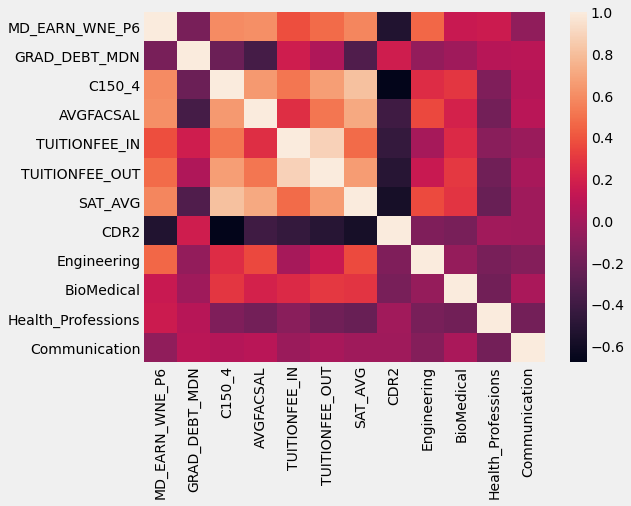

In [17]:
sns.heatmap(edf_corr)

C:\Users\hwk70\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MD_EARN_WNE_P6', ylabel='Density'>

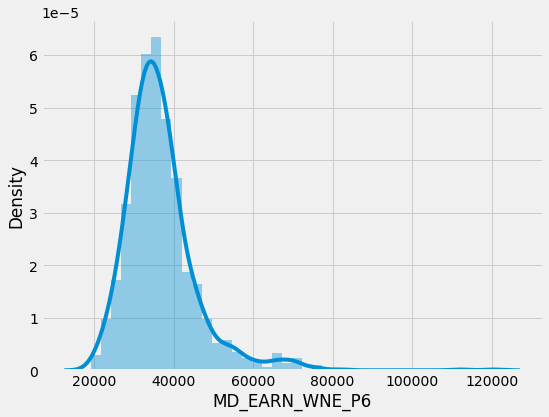

In [18]:
sns.distplot(edf['MD_EARN_WNE_P6'], bins=40, kde=True)

In [19]:
edf.describe()

,MD_EARN_WNE_P6,GRAD_DEBT_MDN,C150_4,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2,Engineering,BioMedical,Health_Professions,Communication
count,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,36720.065520,23112.748567,0.577652,8283.987715,24455.645373,29108.281736,1143.094185,0.055573,0.043580,0.064730,0.130626,0.038912
std,9264.982478,4075.850423,0.174746,2498.751224,14772.455040,11665.298389,124.025520,0.036329,0.101103,0.053768,0.165962,0.036575
min,19200.000000,4833.000000,0.000000,2884.000000,1080.000000,1080.000000,785.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31200.000000,20838.000000,0.457100,6609.000000,10520.000000,19653.000000,1060.000000,0.031000,0.000000,0.033000,0.012400,0.008300
50%,35300.000000,23750.000000,0.571000,7816.000000,23300.000000,27960.000000,1124.000000,0.048000,0.000000,0.053700,0.084700,0.033400
75%,40100.000000,26000.000000,0.694400,9521.000000,35002.000000,36358.000000,1202.000000,0.071000,0.044000,0.087700,0.180600,0.059900
max,120400.000000,37192.000000,1.000000,20484.000000,59430.000000,59430.000000,1566.000000,0.295000,0.875200,0.663600,1.000000,0.354800


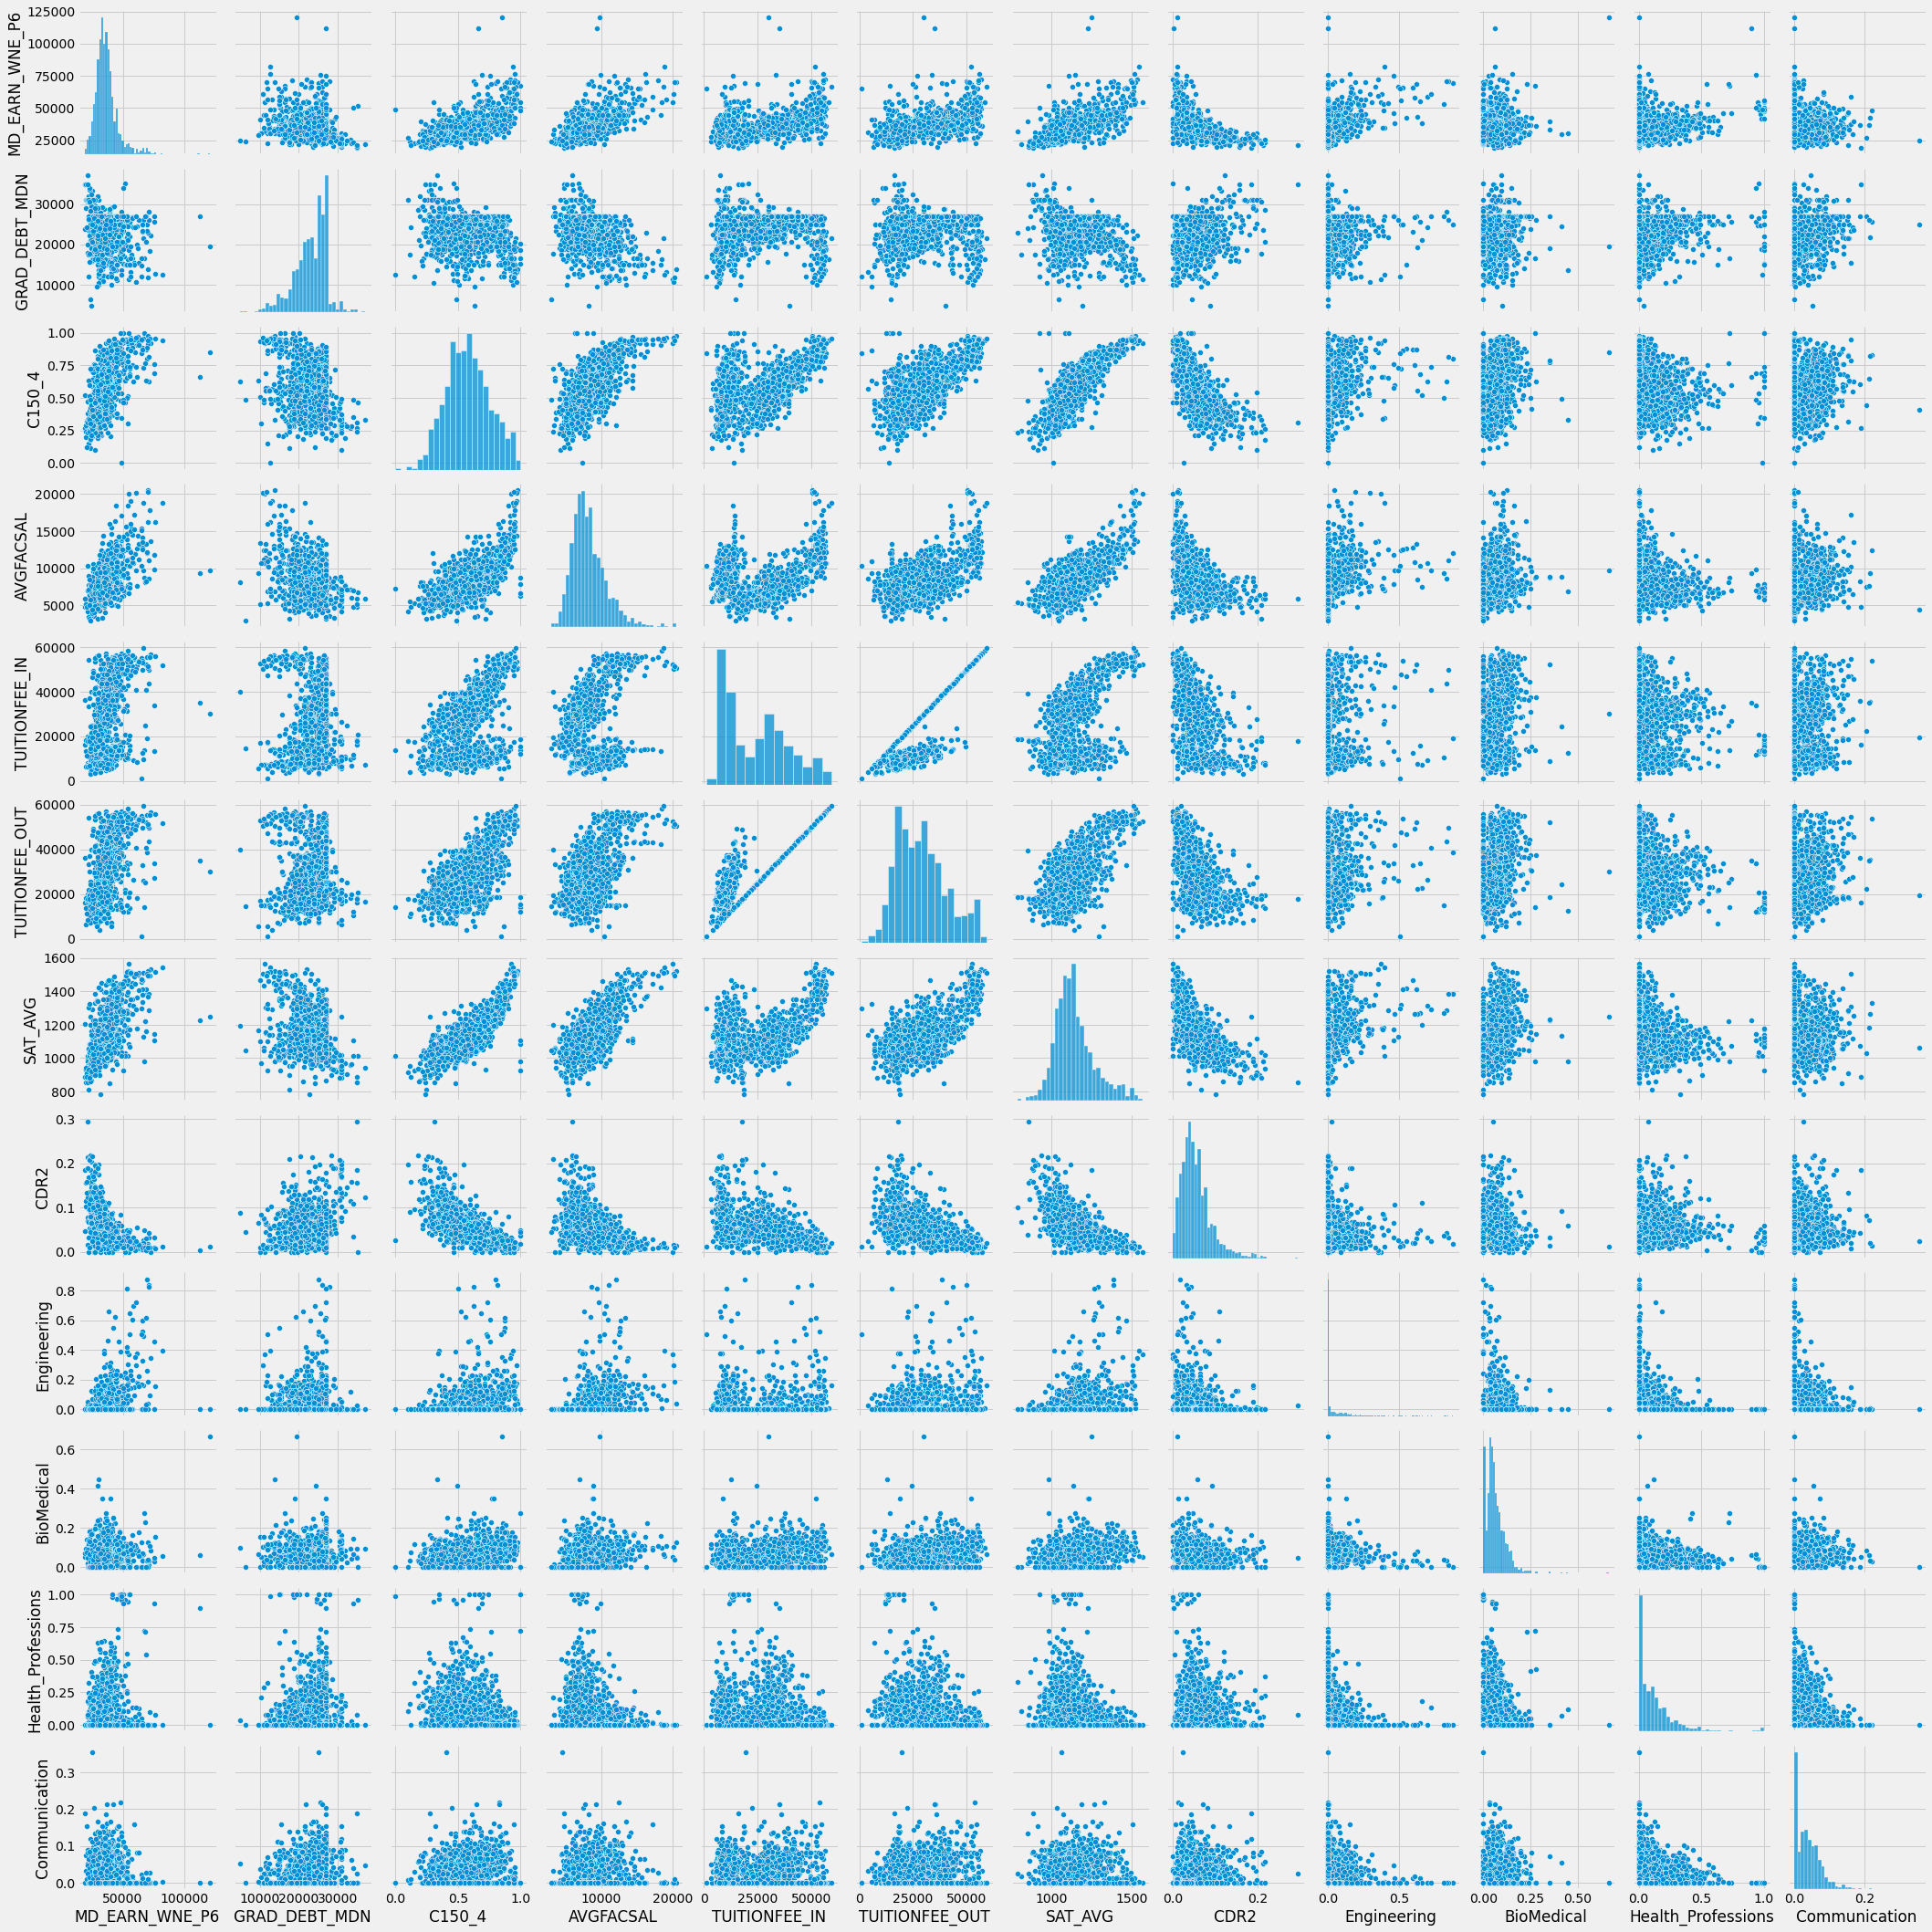

In [20]:
sns.pairplot(edf);

In [21]:
edf['MD_EARN_WNE_P6'].describe()

count      1221.000000
mean      36720.065520
std        9264.982478
min       19200.000000
25%       31200.000000
50%       35300.000000
75%       40100.000000
max      120400.000000
Name: MD_EARN_WNE_P6, dtype: float64

<AxesSubplot:>

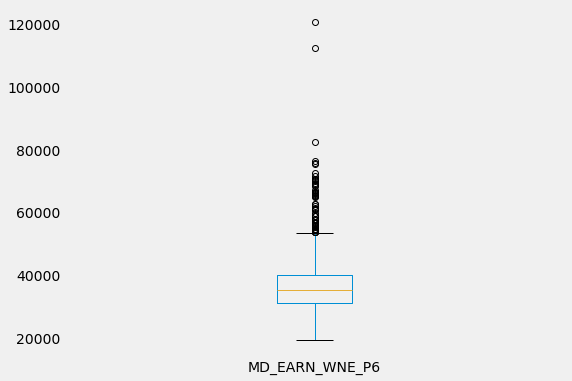

In [22]:
edf.boxplot(column =['MD_EARN_WNE_P6'], grid = False) 


BASE LINEAR Regression

In [23]:
feature_cols = ['GRAD_DEBT_MDN', 'C150_4', 'AVGFACSAL', 'TUITIONFEE_IN', 'TUITIONFEE_OUT', 'SAT_AVG', 'CDR2', 'Engineering', 'BioMedical', 'Health_Professions', 'Communication']

In [24]:
X = edf[feature_cols]
y= edf.MD_EARN_WNE_P6


In [25]:
print((type(X)))
print((type(X.values)))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [26]:
print((type(y)))
print((type(y.values)))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lr = LinearRegression()
type(lr)

sklearn.linear_model._base.LinearRegression

In [29]:
lr.fit(X,y)

LinearRegression()

In [30]:
print(lr.intercept_)
print(lr.coef_)

21918.208737106208
[-2.24609808e-02  6.16026584e+03  1.46523480e+00  1.65523214e-01
 -9.70738960e-02 -2.66542555e+00 -5.00253941e+04  3.14725421e+04
  1.11588142e+04  1.72809820e+04 -3.13874401e+03]


In [31]:
list(zip(feature_cols, lr.coef_))

[('GRAD_DEBT_MDN', -0.02246098077992674),
 ('C150_4', 6160.265838470877),
 ('AVGFACSAL', 1.4652347982946616),
 ('TUITIONFEE_IN', 0.1655232143464266),
 ('TUITIONFEE_OUT', -0.09707389601900997),
 ('SAT_AVG', -2.6654255512494287),
 ('CDR2', -50025.394112063674),
 ('Engineering', 31472.542110656614),
 ('BioMedical', 11158.814232549483),
 ('Health_Professions', 17280.981958957575),
 ('Communication', -3138.7440111580936)]

In [32]:
y_pred_base=lr.predict(X)
y_pred_base

array([29562.31772668, 41274.08132593, 42905.24327746, ...,
       35824.7547134 , 48351.33248767, 37604.69432671])

In [33]:
lr.score(X, y)

0.6578093034755882

In [36]:
from sklearn import metrics
import numpy as np

Train Test Split on Linear Regression

In [37]:
def train_test_rmse(df, feature_cols, response):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=123)
    
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [38]:
print(train_test_rmse(edf, feature_cols, y))

4611.9655794834025


In [39]:
X2 = sm.add_constant(X)  #Adds our y intercept
est = sm.OLS(y, X2)  # adds our OLS model
est2 = est.fit() # fits our model
print(est2.summary()) #Tada!

                            OLS Regression Results                            
Dep. Variable:         MD_EARN_WNE_P6   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     211.3
Date:                Mon, 22 Mar 2021   Prob (F-statistic):          2.85e-272
Time:                        17:46:35   Log-Likelihood:                -12230.
No. Observations:                1221   AIC:                         2.448e+04
Df Residuals:                    1209   BIC:                         2.455e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2.192e+04   2948

Descion Tree with some tuning

In [43]:
from sklearn.tree import DecisionTreeRegressor

X = edf[feature_cols]
y= edf.MD_EARN_WNE_P6


In [44]:
edf['prediction'] = edf.MD_EARN_WNE_P6.mean()
edf

,MD_EARN_WNE_P6,GRAD_DEBT_MDN,C150_4,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2,Engineering,BioMedical,Health_Professions,Communication,prediction
0,25200.0,33375.0,0.2685,7101.0,9744.0,18354.0,957.0,0.114,0.1183,0.0927,0.0000,0.0000,36720.06552
1,35100.0,22500.0,0.5829,10717.0,8568.0,19704.0,1220.0,0.060,0.0813,0.0876,0.2255,0.0375,36720.06552
3,36200.0,21607.0,0.5187,9442.0,10714.0,22362.0,1314.0,0.077,0.2892,0.0436,0.1543,0.0194,36720.06552
4,22600.0,32000.0,0.3001,7754.0,11068.0,19396.0,972.0,0.132,0.0000,0.0831,0.1677,0.0892,36720.06552
5,37400.0,23250.0,0.7188,10225.0,10780.0,29230.0,1252.0,0.066,0.1160,0.0332,0.1101,0.0973,36720.06552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,36800.0,18750.0,0.3372,9574.0,5821.0,16736.0,1188.0,0.054,0.0000,0.1164,0.0484,0.0319,36720.06552
5001,24900.0,25000.0,0.4091,4413.0,19500.0,19500.0,1060.0,0.024,0.0000,0.0000,0.0000,0.3548,36720.06552
5112,35500.0,21500.0,0.5124,9477.0,36450.0,36450.0,1237.0,0.037,0.0000,0.0000,0.0000,0.0000,36720.06552
5238,41800.0,19500.0,0.5857,6698.0,13352.0,13352.0,1180.0,0.032,0.0000,0.0000,1.0000,0.0000,36720.06552


In [45]:
treereg = DecisionTreeRegressor(max_depth=5, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=5, random_state=1)

In [46]:
treereg.score(X,y)

0.7518566205254822

In [47]:
# Calculate RMSE for those predictions.
from sklearn import metrics
import numpy as np

np.sqrt(metrics.mean_squared_error(edf.MD_EARN_WNE_P6, edf.prediction))

9261.187687057449

In [48]:
def debt_split(GRAD_DEBT_MDN):
    lower_debt_wage = edf[edf.GRAD_DEBT_MDN < GRAD_DEBT_MDN].MD_EARN_WNE_P6.mean()
    higher_debt_wage = edf[edf.GRAD_DEBT_MDN >= GRAD_DEBT_MDN].MD_EARN_WNE_P6.mean()
    edf['prediction'] = np.where(edf.GRAD_DEBT_MDN < GRAD_DEBT_MDN, lower_debt_wage, higher_debt_wage)
    return np.sqrt(metrics.mean_squared_error(edf.MD_EARN_WNE_P6, edf.prediction))

In [49]:
#def earnings_split(MD_EARN_WNE_P6):
 #   lower_wage = edf[edf.MD_EARN_WNE_P6 < MD_EARN_WNE_P6].GRAD_DEBT_MDN.mean()
  #  higher_wage = edf[edf.MD_EARN_WNE_P6 >= MD_EARN_WNE_P6].GRAD_DEBT_MDN.mean()
   # edf['prediction'] = np.where(edf.MD_EARN_WNE_P6 < GRAD_DEBT_MDN, lower_wage, higher_wage)
 #   return np.sqrt(metrics.mean_squared_error(edf.GRAD_DEBT_MDN, edf.prediction))

In [50]:
print('RMSE:', debt_split(30000))
edf

RMSE: 9094.74072491305


,MD_EARN_WNE_P6,GRAD_DEBT_MDN,C150_4,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2,Engineering,BioMedical,Health_Professions,Communication,prediction
0,25200.0,33375.0,0.2685,7101.0,9744.0,18354.0,957.0,0.114,0.1183,0.0927,0.0000,0.0000,25706.666667
1,35100.0,22500.0,0.5829,10717.0,8568.0,19704.0,1220.0,0.060,0.0813,0.0876,0.2255,0.0375,36997.481108
3,36200.0,21607.0,0.5187,9442.0,10714.0,22362.0,1314.0,0.077,0.2892,0.0436,0.1543,0.0194,36997.481108
4,22600.0,32000.0,0.3001,7754.0,11068.0,19396.0,972.0,0.132,0.0000,0.0831,0.1677,0.0892,25706.666667
5,37400.0,23250.0,0.7188,10225.0,10780.0,29230.0,1252.0,0.066,0.1160,0.0332,0.1101,0.0973,36997.481108
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,36800.0,18750.0,0.3372,9574.0,5821.0,16736.0,1188.0,0.054,0.0000,0.1164,0.0484,0.0319,36997.481108
5001,24900.0,25000.0,0.4091,4413.0,19500.0,19500.0,1060.0,0.024,0.0000,0.0000,0.0000,0.3548,36997.481108
5112,35500.0,21500.0,0.5124,9477.0,36450.0,36450.0,1237.0,0.037,0.0000,0.0000,0.0000,0.0000,36997.481108
5238,41800.0,19500.0,0.5857,6698.0,13352.0,13352.0,1180.0,0.032,0.0000,0.0000,1.0000,0.0000,36997.481108


In [51]:
print('RMSE:', debt_split(80000))
edf

RMSE: 9261.187687057449


,MD_EARN_WNE_P6,GRAD_DEBT_MDN,C150_4,AVGFACSAL,TUITIONFEE_IN,TUITIONFEE_OUT,SAT_AVG,CDR2,Engineering,BioMedical,Health_Professions,Communication,prediction
0,25200.0,33375.0,0.2685,7101.0,9744.0,18354.0,957.0,0.114,0.1183,0.0927,0.0000,0.0000,36720.06552
1,35100.0,22500.0,0.5829,10717.0,8568.0,19704.0,1220.0,0.060,0.0813,0.0876,0.2255,0.0375,36720.06552
3,36200.0,21607.0,0.5187,9442.0,10714.0,22362.0,1314.0,0.077,0.2892,0.0436,0.1543,0.0194,36720.06552
4,22600.0,32000.0,0.3001,7754.0,11068.0,19396.0,972.0,0.132,0.0000,0.0831,0.1677,0.0892,36720.06552
5,37400.0,23250.0,0.7188,10225.0,10780.0,29230.0,1252.0,0.066,0.1160,0.0332,0.1101,0.0973,36720.06552
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,36800.0,18750.0,0.3372,9574.0,5821.0,16736.0,1188.0,0.054,0.0000,0.1164,0.0484,0.0319,36720.06552
5001,24900.0,25000.0,0.4091,4413.0,19500.0,19500.0,1060.0,0.024,0.0000,0.0000,0.0000,0.3548,36720.06552
5112,35500.0,21500.0,0.5124,9477.0,36450.0,36450.0,1237.0,0.037,0.0000,0.0000,0.0000,0.0000,36720.06552
5238,41800.0,19500.0,0.5857,6698.0,13352.0,13352.0,1180.0,0.032,0.0000,0.0000,1.0000,0.0000,36720.06552


In [52]:
wage_range = np.arange(edf.GRAD_DEBT_MDN.min(), edf.GRAD_DEBT_MDN.max())


In [53]:
RMSE = [debt_split(GRAD_DEBT_MDN) for GRAD_DEBT_MDN in wage_range]

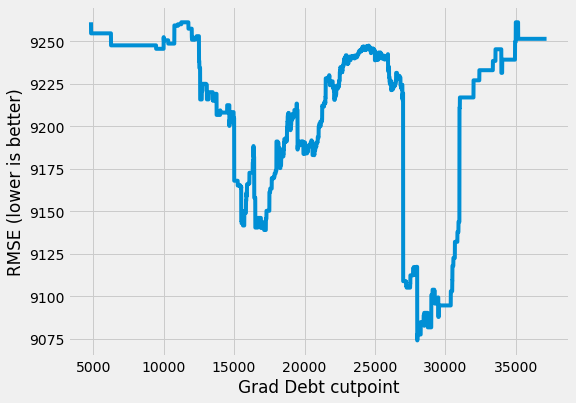

In [54]:
plt.plot(wage_range, RMSE);
plt.xlabel('Grad Debt cutpoint');
plt.ylabel('RMSE (lower is better)');

In [55]:
from sklearn.tree import DecisionTreeRegressor

# List of values to try for max_depth:
max_depth_range = range(1, 21)

# List to store the average RMSE for each value of max_depth:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_depth.
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

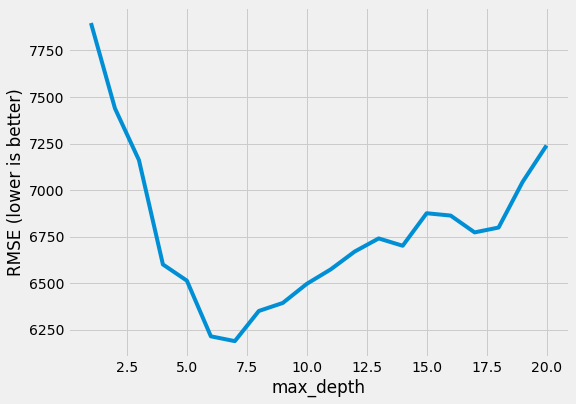

In [56]:
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [57]:
# Show the best RMSE and the corresponding max_depth.
sorted(zip(RMSE_scores, max_depth_range))[0]

(6188.739286513813, 7)

In [58]:
treereg = DecisionTreeRegressor(max_depth=7, random_state=1)
treereg.fit(X, y)



DecisionTreeRegressor(max_depth=7, random_state=1)

In [59]:
treereg.predict(X)

array([28250.        , 40117.5       , 37066.66666667, ...,
       35997.5862069 , 42833.33333333, 40117.5       ])

In [60]:
treereg.score(X,y)

0.8524911784614618

Grid Search Verification

In [61]:
from sklearn.model_selection import GridSearchCV
n=range(1,10)
params={'max_depth': n}
gs = GridSearchCV(DecisionTreeRegressor(),
                  param_grid=params,
                  cv=10)
gs.fit(X, y)
gs.best_params_

{'max_depth': 7}

In [62]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
1,C150_4,0.323717
6,CDR2,0.130142
7,Engineering,0.128057
9,Health_Professions,0.105586
2,AVGFACSAL,0.093821
8,BioMedical,0.088460
3,TUITIONFEE_IN,0.082563
10,Communication,0.024176
5,SAT_AVG,0.012374
0,GRAD_DEBT_MDN,0.006631


In [63]:
# Create a Graphviz file.
from sklearn.tree import export_graphviz
export_graphviz(treereg, out_file='./data/tree_vehicles.dot', feature_names=feature_cols)

# At the command line, run this to convert to PNG:
#   dot -Tpng tree_vehicles.dot -o tree_vehicles.png

# Or, you can drag the image below to your desktop or Powerpoint!

In [64]:
pred = gs.predict(X)
pred

array([28250.        , 40117.5       , 37066.66666667, ...,
       35997.5862069 , 42833.33333333, 40117.5       ])

In [65]:
pred_best = gs.best_estimator_.predict(X)
pred_best

array([28250.        , 40117.5       , 37066.66666667, ...,
       35997.5862069 , 42833.33333333, 40117.5       ])

In [66]:
gs.score(X,y)

0.8524911784614618

Random Forest

In [69]:
from sklearn.ensemble import RandomForestRegressor
X = edf[feature_cols]
y= edf.MD_EARN_WNE_P6

In [70]:
rfreg = RandomForestRegressor(n_estimators=150,
                              max_features=5,
                              oob_score=True,
                              random_state=1)
print(rfreg.fit(X, y))
print(rfreg.predict(X))
print(rfreg.score(X,y))

RandomForestRegressor(max_features=5, n_estimators=150, oob_score=True,
                      random_state=1)
[25526.         36202.         36820.66666667 ... 35282.
 43678.66666667 39105.33333333]
0.9574713964501775


In [71]:
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
1,C150_4,0.202468
2,AVGFACSAL,0.167034
6,CDR2,0.133508
7,Engineering,0.100660
5,SAT_AVG,0.098337
9,Health_Professions,0.096494
8,BioMedical,0.079781
4,TUITIONFEE_OUT,0.042381
3,TUITIONFEE_IN,0.033008
0,GRAD_DEBT_MDN,0.026447


In [72]:
# Compute the out-of-bag R-squared score.
print((rfreg.oob_score_))
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

0.6803542653597844


5119.845145230626

Reducing X to the most important Features

In [73]:
X.shape

(1221, 11)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1234)

In [75]:
rfreg = RandomForestRegressor(n_estimators=150, max_features=5, oob_score=True, random_state=1)
rfreg.fit(X_train, y_train)

RandomForestRegressor(max_features=5, n_estimators=150, oob_score=True,
                      random_state=1)

In [76]:
# Set a threshold for which features to include.
from sklearn.feature_selection import SelectFromModel

print(SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_train).shape)
print(SelectFromModel(rfreg, threshold='median', prefit=True).transform(X_train).shape)

(915, 6)
(915, 6)


In [77]:
X_important =  SelectFromModel(rfreg, threshold='mean', prefit=True).transform(X_test)

In [78]:
# List of values to try for max_features:
feature_range = range(1, len(feature_cols) + 1)

# List to store the average RMSE for each value of max_features:
RMSE_scores = []

# Use 10-fold cross-validation with each value of max_features (Warning: Super slow!).
for feature in feature_range:
    rfreg = RandomForestRegressor(n_estimators=150, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

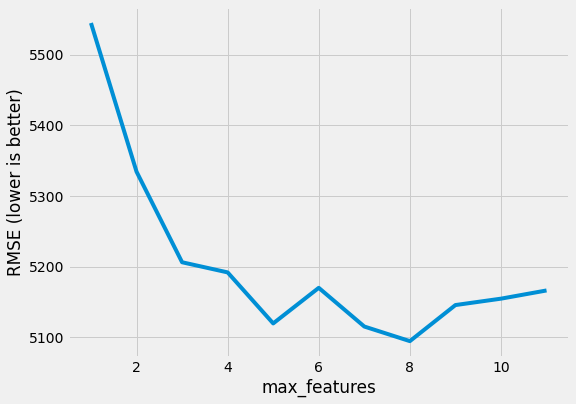

In [79]:
plt.plot(feature_range, RMSE_scores);

plt.xlabel('max_features');
plt.ylabel('RMSE (lower is better)');

In [80]:
# Show the best RMSE and the corresponding max_features.
sorted(zip(RMSE_scores, feature_range))[0]

(5094.790303777564, 8)

In [81]:
rfreg = RandomForestRegressor(n_estimators=150, max_features=8, oob_score=True, random_state=1)
rfreg.fit(X_test, y_test)

RandomForestRegressor(max_features=8, n_estimators=150, oob_score=True,
                      random_state=1)

In [82]:
rfreg.predict(X_test)

array([30786.66666667, 31276.        , 31963.33333333, 48092.        ,
       25910.        , 41451.33333333, 30218.        , 37224.66666667,
       35336.        , 33949.33333333, 31662.        , 31400.        ,
       29563.33333333, 32240.        , 31053.33333333, 27579.33333333,
       36430.        , 29902.        , 45714.        , 28136.        ,
       34938.        , 35982.66666667, 47846.        , 28274.66666667,
       47211.33333333, 38283.33333333, 39366.66666667, 36848.        ,
       35891.33333333, 37145.33333333, 60852.        , 43295.33333333,
       37405.33333333, 64928.66666667, 40742.        , 35867.33333333,
       28544.        , 26455.33333333, 41732.        , 23114.66666667,
       39780.        , 36794.        , 29440.66666667, 24862.66666667,
       30684.        , 35170.66666667, 40655.33333333, 32247.33333333,
       34366.66666667, 40278.        , 37493.33333333, 36195.33333333,
       27606.66666667, 39837.33333333, 31492.        , 38360.66666667,
      

In [83]:
rfreg.score(X_test,y_test)

0.9417589812896779

In [85]:
y_pred=rfreg.predict(X_test)

In [93]:
predf = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})
predf.sort_values(by = 'Actual' )

,Actual,Predicted
2392,20900.0,22213.333333
3217,20900.0,23114.666667
120,21200.0,22694.000000
2479,21500.0,23153.333333
2562,21900.0,22938.000000
...,...,...
1448,70400.0,60604.666667
1372,75200.0,64928.666667
2413,76300.0,69840.666667
1508,82200.0,75468.666667


In [87]:
from sklearn.modepredictlection import GridSearchCV
estimator_range = list(range(10, 310, 10))
feature_range = list(range(1, len(feature_cols) + 1))
param_grid={'n_estimators':estimator_range, 'max_features':feature_range}


rf = RandomForestRegressor(random_state=1)
GSclf = GridSearchCV(rf,param_grid, cv=5)
GSclf.fit(X,y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100, 110, 120, 130, 140, 150, 160,
                                          170, 180, 190, 200, 210, 220, 230,
                                          240, 250, 260, 270, 280, 290, 300]})

In [96]:
GSclf.best_params_

{'max_features': 8, 'n_estimators': 230}

In [97]:
GSclf.predict(X)

array([25290.86956522, 35993.04347826, 36601.30434783, ...,
       35807.82608696, 44273.47826087, 39310.43478261])

In [103]:
GSclf.score(X_test, y_test)

0.9631779373910393

Ran Random Forest with N = 230 and 8 Max Features to verify Grid search

In [99]:
rfreg = RandomForestRegressor(n_estimators=230, max_features=8, oob_score=True, random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(max_features=8, n_estimators=230, oob_score=True,
                      random_state=1)

In [100]:
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

5097.667774417572

In [101]:
rfreg.decision_path(X)

(<1221x339270 sparse matrix of type '<class 'numpy.int64'>'
 	with 4093444 stored elements in Compressed Sparse Row format>,
 array([     0,   1449,   2898,   4369,   5846,   7339,   8808,  10267,
         11732,  13167,  14676,  16179,  17654,  19115,  20554,  22001,
         23474,  24947,  26422,  27951,  29406,  30897,  32372,  33825,
         35316,  36827,  38304,  39803,  41266,  42721,  44196,  45669,
         47136,  48645,  50162,  51633,  53102,  54577,  56010,  57457,
         58964,  60443,  61896,  63351,  64850,  66295,  67768,  69235,
         70760,  72259,  73726,  75221,  76706,  78175,  79636,  81103,
         82552,  84017,  85542,  87027,  88510,  90013,  91484,  92947,
         94384,  95909,  97406,  98911, 100392, 101857, 103318, 104737,
        106234, 107707, 109222, 110713, 112218, 113685, 115180, 116693,
        118166, 119661, 121156, 122615, 124128, 125631, 127112, 128609,
        130102, 131541, 133008, 134473, 135952, 137425, 138880, 140351,
        141

In [102]:
scores = cross_val_score(rfreg, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

5097.667774417572